# HR Dataset Analysis

## 1 - Problem

In this project, we are tasked with exploring a dataset related to Human Resources (HR). As the name suggests, HR is the department responsible for managing employee recruitment, training, and overall development within a company. Naturally, we expect this dataset to provide insights into employees, their training profiles, and their connection to the organization. But does it really reflect this? Let’s find out.

##  2 - Data Analysis

### 2.1 Import Libraries

To begin our analysis, we first imported the required libraries. This cell was updated each time we needed to include additional libraries throughout the process.

In [1]:
import numpy as np  # Numerical operations and array manipulation
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting and data visualization
import seaborn as sns  # Statistical data visualization
# Prediction
from sklearn.linear_model import LogisticRegression  # Logistic regression model for classification
from sklearn.model_selection import train_test_split  # Splitting data into training and test sets
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # Encoding categorical data
from sklearn.compose import ColumnTransformer  # Applying transformations to specific columns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay  # Evaluation metrics and confusion matrix visualization
from sklearn.preprocessing import StandardScaler  # Feature scaling


### 2.2 Data Expolartory

We begin by reading the CSV files and storing the data into appropriately named variables for further analysis.

In [2]:
employeeData = pd.read_csv("./data/Employee.csv")
performanceData = pd.read_csv("./data/PerformanceRating.csv")
educationLevel =  pd.read_csv("./data/EducationLevel.csv")
ratingLevel = pd.read_csv("./data/RatingLevel.csv")
satisfactionLevel=  pd.read_csv("./data/SatisfiedLevel.csv")

In [3]:
employeeData.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


We examine the structure of the `employeeData` DataFrame to understand its columns, data types, and non-null counts

In [4]:
employeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

We verify whether the `EmployeeID` column contains unique values across all records.

In [5]:
employeeData['EmployeeID'].is_unique

True

We extract the categorical features from the dataset to facilitate detailed analysis and preprocessing.

In [6]:
categorical_features = [
    'Gender', 
    'BusinessTravel', 
    'Department', 
    'Ethnicity', 
    'EducationField', 
    'JobRole', 
    'MaritalStatus', 
    'StockOptionLevel', 
    'Attrition'
]


We iterate through each categorical feature and print its unique values to better understand the possible categories within each feature.

In [7]:
for feature in categorical_features:
    unique_values = employeeData[feature].unique()
    print(f"{feature} unique values: {unique_values}")

Gender unique values: ['Female' 'Male' 'Non-Binary' 'Prefer Not To Say']
BusinessTravel unique values: ['Some Travel' 'No Travel ' 'Frequent Traveller']
Department unique values: ['Sales' 'Human Resources' 'Technology']
Ethnicity unique values: ['White' 'Asian or Asian American' 'Mixed or multiple ethnic groups'
 'Black or African American' 'Native Hawaiian ' 'Other '
 'American Indian or Alaska Native']
EducationField unique values: ['Marketing' 'Marketing ' 'Computer Science' 'Technical Degree'
 'Information Systems' 'Other' 'Economics' 'Human Resources'
 'Business Studies']
JobRole unique values: ['Sales Executive' 'HR Business Partner' 'Engineering Manager' 'Recruiter'
 'Data Scientist' 'Machine Learning Engineer' 'Manager'
 'Software Engineer' 'Senior Software Engineer' 'Sales Representative'
 'Analytics Manager' 'HR Executive' 'HR Manager']
MaritalStatus unique values: ['Divorced' 'Single' 'Married']
StockOptionLevel unique values: [1 0 2 3]
Attrition unique values: ['No' 'Yes']


During our data inspection, we noticed a discrepancy in the `EducationField` column where 'Marketing ' (with an extra space) and 'Marketing' were treated as different values. To address this, we removed any leading or trailing spaces to ensure uniformity.

In [8]:
employeeData['EducationField'] = employeeData['EducationField'].str.strip()
employeeData['EducationField'].unique()

array(['Marketing', 'Computer Science', 'Technical Degree',
       'Information Systems', 'Other', 'Economics', 'Human Resources',
       'Business Studies'], dtype=object)

We utilized the following command to analyze the numeric values and extract essential information:

In [9]:
employeeData.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,28.989796,7.993055,18.0,23.0,26.0,34.00,51.0
DistanceFromHome (KM),1470.0,22.502721,12.811124,1.0,12.0,22.0,33.00,45.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
Salary,1470.0,112956.497959,103342.889222,20387.0,43580.5,71199.5,142055.75,547204.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.00,3.0
YearsAtCompany,1470.0,4.562585,3.288048,0.0,2.0,4.0,7.00,10.0
YearsInMostRecentRole,1470.0,2.293197,2.539093,0.0,0.0,1.0,4.00,10.0
YearsSinceLastPromotion,1470.0,3.440816,2.945194,0.0,1.0,3.0,6.00,10.0
YearsWithCurrManager,1470.0,2.239456,2.505774,0.0,0.0,1.0,4.00,10.0


The column named `DistanceFromHome (KM)` contains both spaces and parentheses. Such formatting can lead to complications when accessing the column programmatically.

In [10]:
employeeData.rename(columns={'DistanceFromHome (KM)': 'Distance_KM'}, inplace=True)
employeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   Distance_KM              1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

The `HireDate` column is currently of `Object` data type, which may impact our analysis. Therefore, it is essential to convert it to a date format:

In [11]:
employeeData['HireDate'] = pd.to_datetime(employeeData['HireDate'])
employeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1470 non-null   object        
 1   FirstName                1470 non-null   object        
 2   LastName                 1470 non-null   object        
 3   Gender                   1470 non-null   object        
 4   Age                      1470 non-null   int64         
 5   BusinessTravel           1470 non-null   object        
 6   Department               1470 non-null   object        
 7   Distance_KM              1470 non-null   int64         
 8   State                    1470 non-null   object        
 9   Ethnicity                1470 non-null   object        
 10  Education                1470 non-null   int64         
 11  EducationField           1470 non-null   object        
 12  JobRole                  1470 non-

In [12]:
employeeData.describe().T

,count,mean,min,25%,50%,75%,max,std
Age,1470.0,28.989796,18.0,23.0,26.0,34.0,51.0,7.993055
Distance_KM,1470.0,22.502721,1.0,12.0,22.0,33.0,45.0,12.811124
Education,1470.0,2.912925,1.0,2.0,3.0,4.0,5.0,1.024165
Salary,1470.0,112956.497959,20387.0,43580.5,71199.5,142055.75,547204.0,103342.889222
StockOptionLevel,1470.0,0.793878,0.0,0.0,1.0,1.0,3.0,0.852077
HireDate,1470,2017-07-05 14:50:26.938775296,2012-01-03 00:00:00,2014-07-10 06:00:00,2017-09-02 00:00:00,2020-05-14 18:00:00,2022-12-31 00:00:00,NaN
YearsAtCompany,1470.0,4.562585,0.0,2.0,4.0,7.0,10.0,3.288048
YearsInMostRecentRole,1470.0,2.293197,0.0,0.0,1.0,4.0,10.0,2.539093
YearsSinceLastPromotion,1470.0,3.440816,0.0,1.0,3.0,6.0,10.0,2.945194
YearsWithCurrManager,1470.0,2.239456,0.0,0.0,1.0,4.0,10.0,2.505774


In [13]:
performanceData.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


In [14]:
performanceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


The `ReviewDate` column exhibits the same issue as the `HireDate` column, being of `Object` data type. Thus, it is important to convert it to a date format:

In [15]:
performanceData['ReviewDate'] = pd.to_datetime(performanceData['ReviewDate'])
performanceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   PerformanceID                    6709 non-null   object        
 1   EmployeeID                       6709 non-null   object        
 2   ReviewDate                       6709 non-null   datetime64[ns]
 3   EnvironmentSatisfaction          6709 non-null   int64         
 4   JobSatisfaction                  6709 non-null   int64         
 5   RelationshipSatisfaction         6709 non-null   int64         
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64         
 7   TrainingOpportunitiesTaken       6709 non-null   int64         
 8   WorkLifeBalance                  6709 non-null   int64         
 9   SelfRating                       6709 non-null   int64         
 10  ManagerRating                    6709 non-null   int64      

### 2.3 Data Cleaning

#### Check for Null Values

To assess the completeness of our datasets, we checked for missing values in both the `employeeData` and `performanceData` DataFrames. The following commands were used:

In [16]:
employeeData.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
Distance_KM                0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [17]:
performanceData.isnull().sum()

PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
dtype: int64

#### Check for Duplicates

To evaluate the uniqueness of our datasets, we examined both the employeeData and performanceData DataFrames for duplicate entries. The following commands were executed:

In [18]:
employeeData.duplicated().sum()

np.int64(0)

In [19]:
performanceData.duplicated().sum()

np.int64(0)

#### Check for Outliers

To investigate potential outliers in the `Age` category, we performed a boxplot and histogram analysis on the `Age` column of the `employeeData` DataFrame.

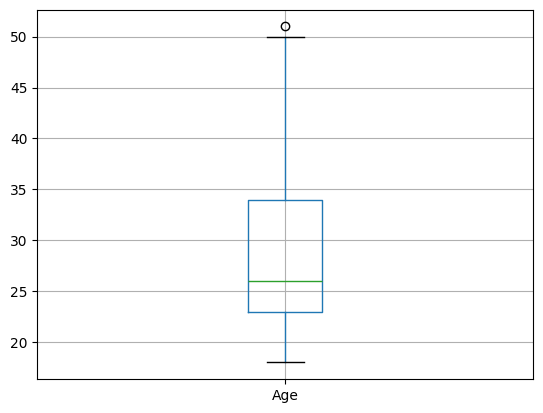

In [20]:
employeeData.boxplot(column='Age')
plt.show()

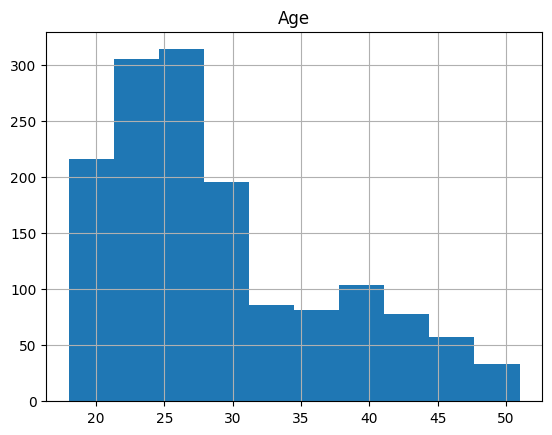

In [21]:
employeeData.hist(column='Age')
plt.show()

To analyze the distribution and identify potential outliers in the `Salary` category, we created a boxplot and histogram for the `Salary` column in the `employeeData` DataFrame.

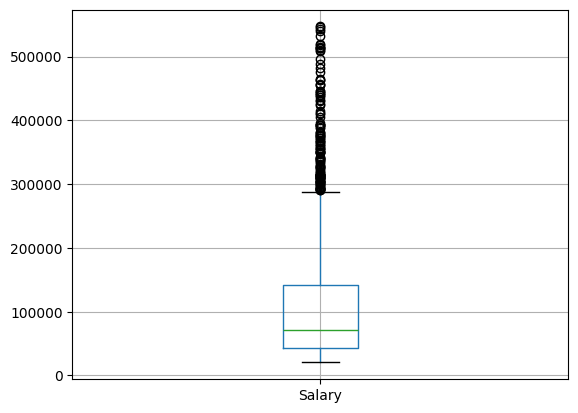

In [22]:
employeeData.boxplot(column='Salary')
plt.show()

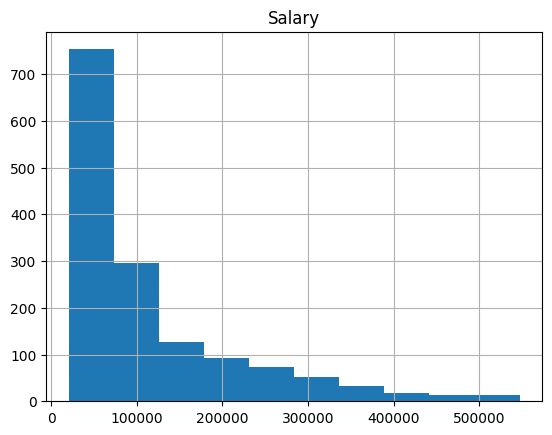

In [23]:
employeeData.hist(column='Salary')
plt.show()

The histogram of the `Salary` distribution reveals a right-skewed pattern, indicating that a smaller number of individuals earn higher salaries. This observation is logical, as typically, most employees tend to earn salaries within a certain range, while fewer individuals occupy the higher salary brackets.


### 2.4 Attrition Analysis

To establish relationships among our datasets for further analysis, we performed a series of merges to combine the `employeeData`, `performanceData`, and additional related datasets. 

In [24]:
merged_data = employeeData.merge(performanceData, on='EmployeeID', how='left') \
    .merge(educationLevel, left_on='Education', right_on='EducationLevelID', how='left') \
    .merge(satisfactionLevel, left_on='EnvironmentSatisfaction', right_on='SatisfactionID', how='left') \
    .rename(columns={'SatisfactionLevel': 'EnviromentSatisfactionLevel'}) \
    .merge(satisfactionLevel, left_on='JobSatisfaction', right_on='SatisfactionID', how='left') \
    .rename(columns={'SatisfactionLevel': 'JobSatisfactionLevel'}) \
    .merge(satisfactionLevel, left_on='RelationshipSatisfaction', right_on='SatisfactionID', how='left') \
    .rename(columns={'SatisfactionLevel': 'RelationshipSatisfactionLevel'}) \
    .merge(ratingLevel, left_on='SelfRating', right_on='RatingID', how='left') \
    .rename(columns={'RatingLevel': 'SelfRatingLevel'}) \
    .merge(ratingLevel, left_on='ManagerRating', right_on='RatingID', how='left') \
    .rename(columns={'RatingLevel': 'ManagerRatingLevel'})

merged_data.head(5)

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,Distance_KM,State,Ethnicity,...,SatisfactionID_x,EnviromentSatisfactionLevel,SatisfactionID_y,JobSatisfactionLevel,SatisfactionID,RelationshipSatisfactionLevel,RatingID_x,SelfRatingLevel,RatingID_y,ManagerRatingLevel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,3.0,Neutral,3.0,Neutral,2.0,Dissatisfied,3.0,Meets Expectation,3.0,Meets Expectation
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,4.0,Satisfied,4.0,Satisfied,5.0,Very Satisfied,3.0,Meets Expectation,2.0,Needs Improvement
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,5.0,Very Satisfied,5.0,Very Satisfied,4.0,Satisfied,5.0,Above and Beyond,5.0,Above and Beyond
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,1.0,Very Dissatisfied,3.0,Neutral,2.0,Dissatisfied,5.0,Above and Beyond,4.0,Exceeds Expectation
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,3.0,Neutral,4.0,Satisfied,2.0,Dissatisfied,4.0,Exceeds Expectation,3.0,Meets Expectation


In [25]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6899 non-null   object        
 1   FirstName                        6899 non-null   object        
 2   LastName                         6899 non-null   object        
 3   Gender                           6899 non-null   object        
 4   Age                              6899 non-null   int64         
 5   BusinessTravel                   6899 non-null   object        
 6   Department                       6899 non-null   object        
 7   Distance_KM                      6899 non-null   int64         
 8   State                            6899 non-null   object        
 9   Ethnicity                        6899 non-null   object        
 10  Education                        6899 non-null   int64      

In [26]:
merged_data.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,Distance_KM,State,Ethnicity,...,SatisfactionID_x,EnviromentSatisfactionLevel,SatisfactionID_y,JobSatisfactionLevel,SatisfactionID,RelationshipSatisfactionLevel,RatingID_x,SelfRatingLevel,RatingID_y,ManagerRatingLevel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,3.0,Neutral,3.0,Neutral,2.0,Dissatisfied,3.0,Meets Expectation,3.0,Meets Expectation
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,4.0,Satisfied,4.0,Satisfied,5.0,Very Satisfied,3.0,Meets Expectation,2.0,Needs Improvement
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,5.0,Very Satisfied,5.0,Very Satisfied,4.0,Satisfied,5.0,Above and Beyond,5.0,Above and Beyond
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,1.0,Very Dissatisfied,3.0,Neutral,2.0,Dissatisfied,5.0,Above and Beyond,4.0,Exceeds Expectation
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,3.0,Neutral,4.0,Satisfied,2.0,Dissatisfied,4.0,Exceeds Expectation,3.0,Meets Expectation


Following the merge operation, we might encounter redundant columns that were created due to the merging of similar data sources.

In [27]:
merged_data = merged_data.drop(columns=[
    'SatisfactionID_x', 'SatisfactionID_y', 
    'RatingID_x', 'RatingID_y', 'SatisfactionID', 'EducationLevelID'
])

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6899 non-null   object        
 1   FirstName                        6899 non-null   object        
 2   LastName                         6899 non-null   object        
 3   Gender                           6899 non-null   object        
 4   Age                              6899 non-null   int64         
 5   BusinessTravel                   6899 non-null   object        
 6   Department                       6899 non-null   object        
 7   Distance_KM                      6899 non-null   int64         
 8   State                            6899 non-null   object        
 9   Ethnicity                        6899 non-null   object        
 10  Education                        6899 non-null   int64      

In [28]:
merged_data.head().T

,0,1,2,3,4
EmployeeID,3012-1A41,3012-1A41,3012-1A41,3012-1A41,3012-1A41
FirstName,Leonelle,Leonelle,Leonelle,Leonelle,Leonelle
LastName,Simco,Simco,Simco,Simco,Simco
Gender,Female,Female,Female,Female,Female
Age,30,30,30,30,30
BusinessTravel,Some Travel,Some Travel,Some Travel,Some Travel,Some Travel
Department,Sales,Sales,Sales,Sales,Sales
Distance_KM,27,27,27,27,27
State,IL,IL,IL,IL,IL
Ethnicity,White,White,White,White,White


After cleaning the `merged_data` DataFrame, it's crucial to re-evaluate its completeness to ensure that no missing values were inadvertently introduced during the data manipulation process.

In [29]:
merged_data.isnull().sum()

EmployeeID                           0
FirstName                            0
LastName                             0
Gender                               0
Age                                  0
BusinessTravel                       0
Department                           0
Distance_KM                          0
State                                0
Ethnicity                            0
Education                            0
EducationField                       0
JobRole                              0
MaritalStatus                        0
Salary                               0
StockOptionLevel                     0
OverTime                             0
HireDate                             0
Attrition                            0
YearsAtCompany                       0
YearsInMostRecentRole                0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
PerformanceID                      190
ReviewDate                         190
EnvironmentSatisfaction  

Given that null values in this context are not relevant to our analysis, we will proceed by removing any cells containing these values from our dataset.

In [30]:
merged_data.dropna(subset=['PerformanceID'], inplace=True)

In [31]:
# df_cleaned = df.dropna(how='all')
merged_data.isnull().sum()

EmployeeID                         0
FirstName                          0
LastName                           0
Gender                             0
Age                                0
BusinessTravel                     0
Department                         0
Distance_KM                        0
State                              0
Ethnicity                          0
Education                          0
EducationField                     0
JobRole                            0
MaritalStatus                      0
Salary                             0
StockOptionLevel                   0
OverTime                           0
HireDate                           0
Attrition                          0
YearsAtCompany                     0
YearsInMostRecentRole              0
YearsSinceLastPromotion            0
YearsWithCurrManager               0
PerformanceID                      0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
R

We've created a count plot to visualize the distribution of employee attrition in our dataset. The plot displays the number of employees who left the company versus those who stayed. 

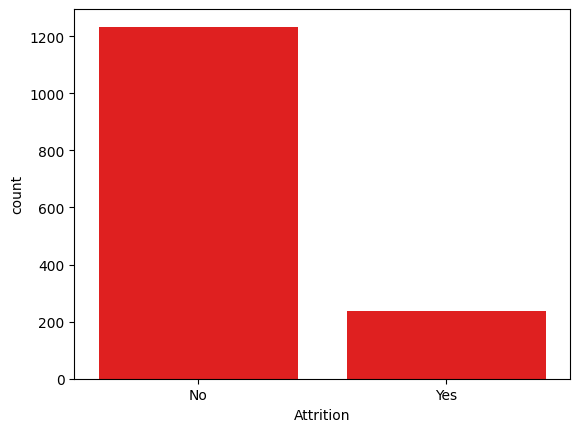

In [32]:
sns.countplot(data=employeeData, color = "red" ,x='Attrition')
plt.show()

This analysis focused on the relationship between employee `Attrition` and `Salary` using a box plot. 

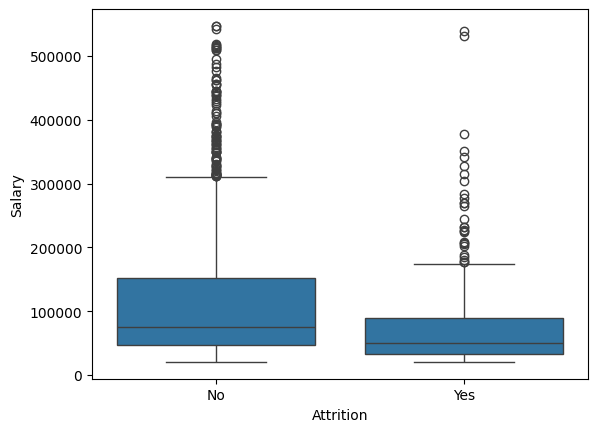

In [33]:
sns.boxplot(x='Attrition', y='Salary', data=employeeData)
plt.show()

This plot displays the distribution of employee attrition across various job roles.

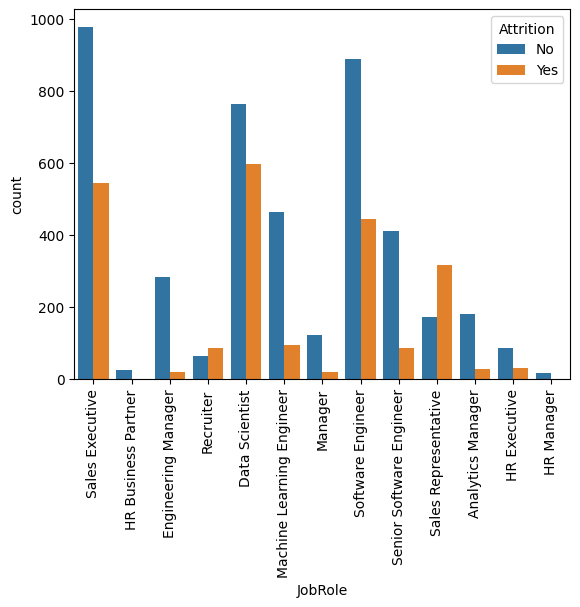

In [34]:
sns.countplot(data=merged_data, x='JobRole', hue='Attrition')
plt.xticks(rotation=90)

plt.show()

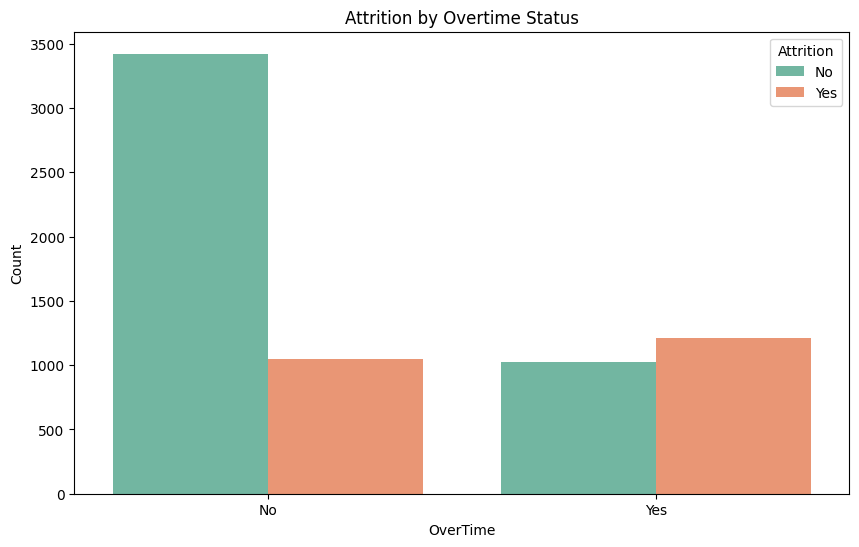

In [35]:
plt.figure(figsize=(10, 6))

sns.countplot(x="OverTime", hue='Attrition', data=merged_data, palette="Set2")

plt.title('Attrition by Overtime Status')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.legend(title='Attrition')

plt.show()

### 2.5 Salary Analysis

We created a scatter plot to examine the relationship between job roles and employee salaries. This visualization allowed us to observe how salaries vary across different job roles, with x-axis labels rotated for enhanced readability.


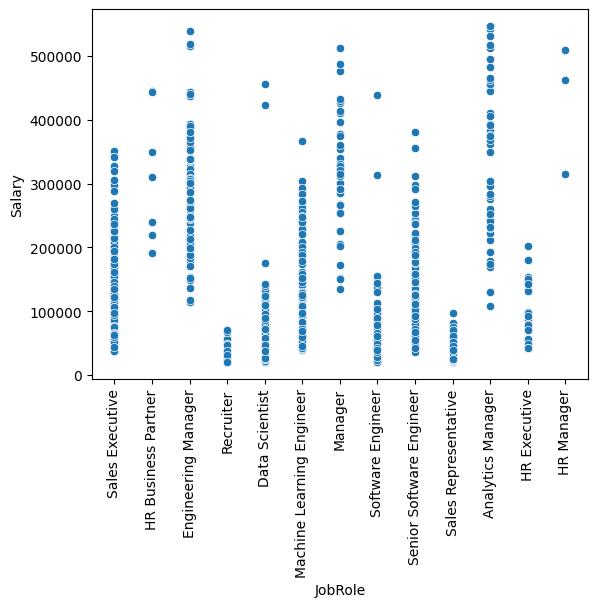

In [36]:

sns.scatterplot(x='JobRole', y='Salary', data=employeeData)
plt.xticks(rotation=90)

plt.show()

We generated a box plot to analyze salary distributions across different job roles, segmented by employee attrition status. This visualization enabled us to identify variations in salary for employees who left the organization compared to those who remained. The x-axis labels are rotated for better readability.


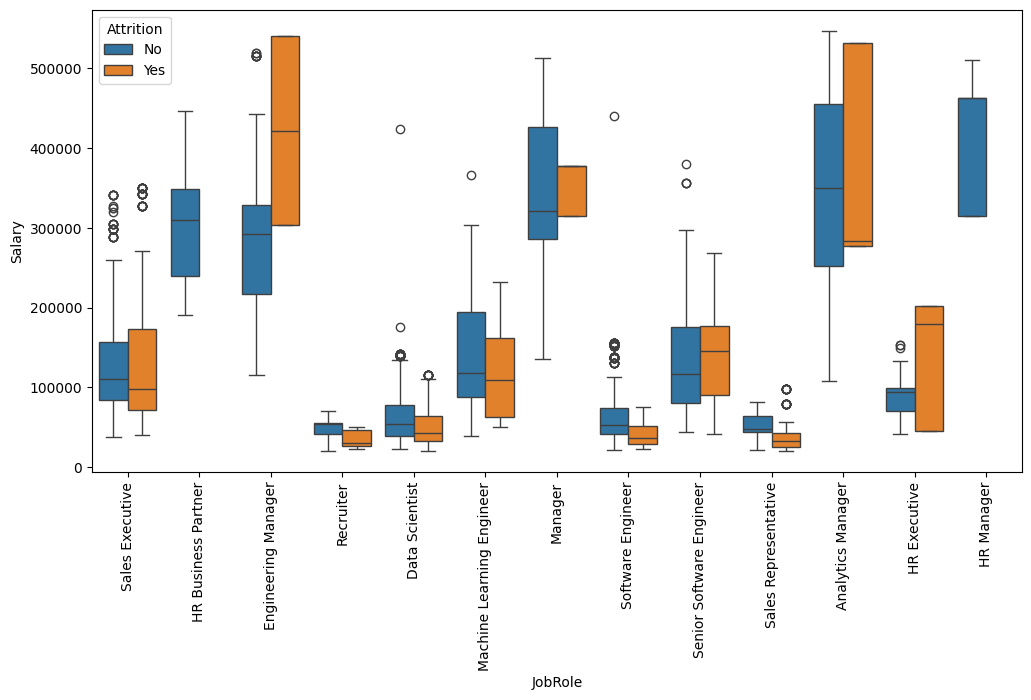

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='JobRole', y='Salary', hue='Attrition')
plt.xticks(rotation=90)
plt.show()

We generated a box plot to analyze salary distributions across different job roles, segmented by employee attrition status. This visualization enabled us to identify variations in salary for employees who left the organization compared to those who remained. The x-axis labels are rotated for better readability.


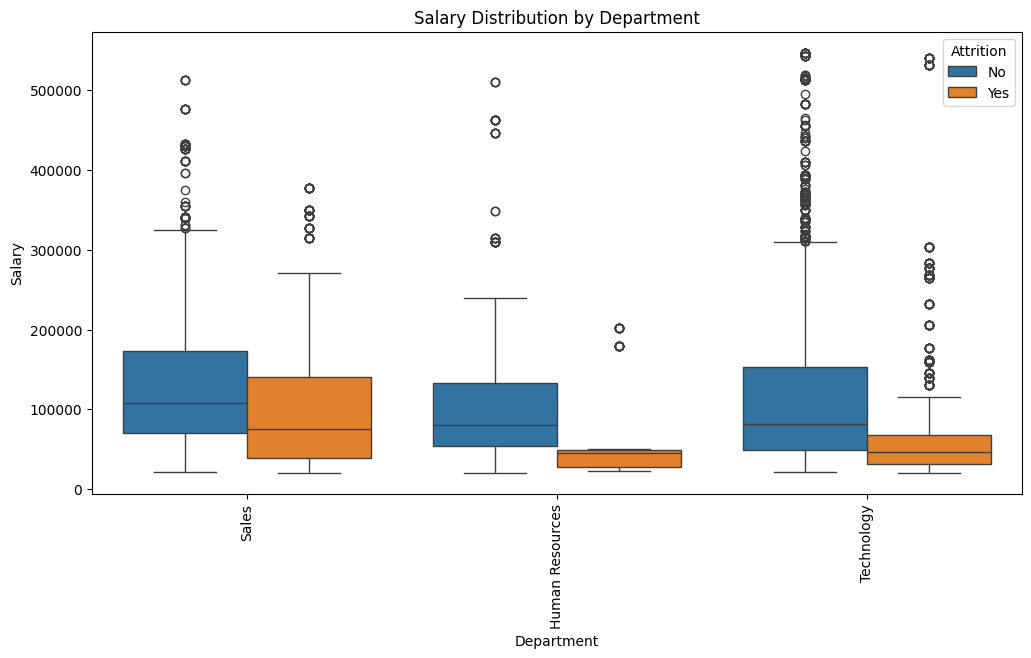

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Department', y='Salary', hue='Attrition')
plt.title('Salary Distribution by Department')
plt.xticks(rotation=90)
plt.show()

We analyzed the distribution of job roles across different departments by grouping the data accordingly. A stacked bar chart was created to visualize the count of job roles in each department, allowing us to understand the composition of job roles within various departments more clearly.


<Figure size 1200x800 with 0 Axes>

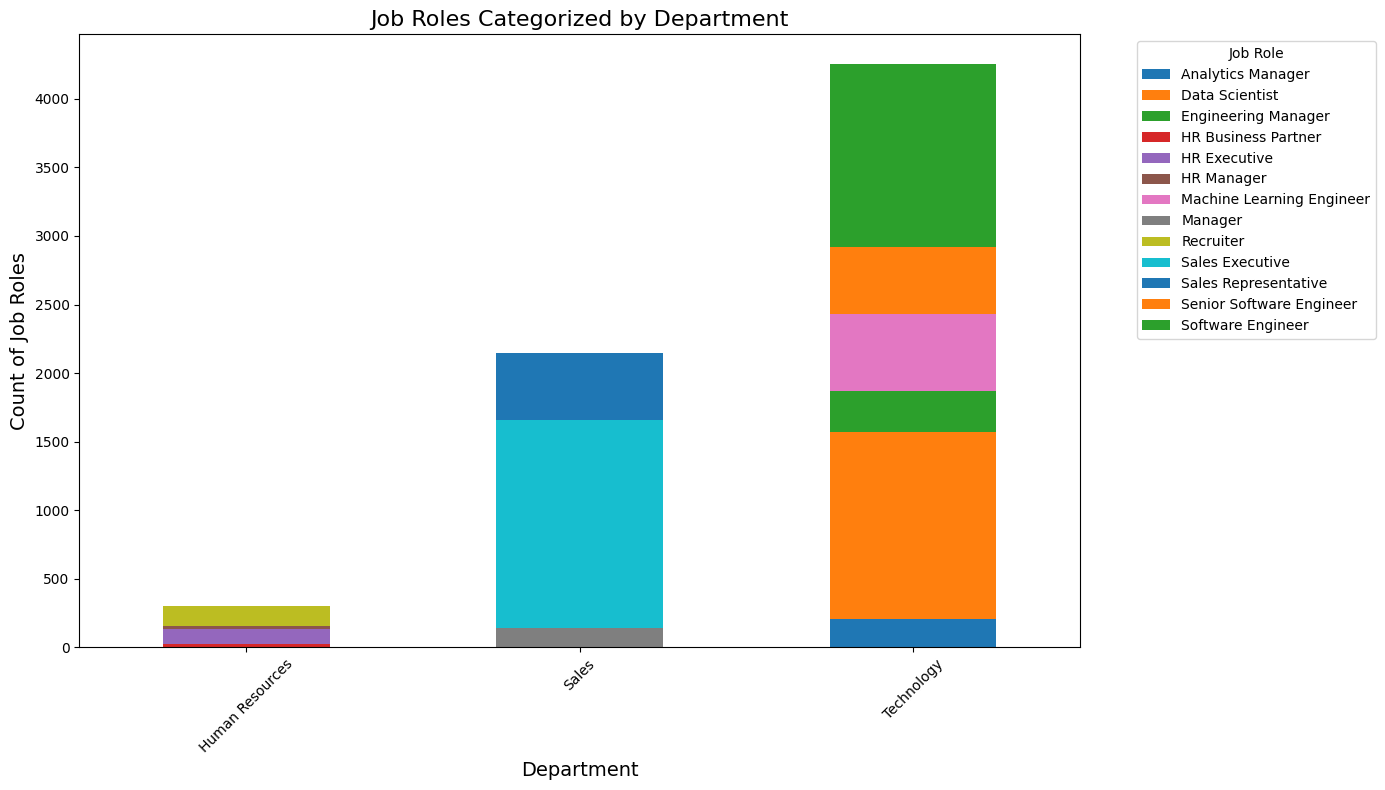

In [39]:
department_jobrole = merged_data.groupby(['Department', 'JobRole']).size().unstack()

plt.figure(figsize=(12, 8))
department_jobrole.plot(kind='bar', stacked=True, figsize=(14,8))

plt.title('Job Roles Categorized by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Count of Job Roles', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

We visualized the age distribution of employees, differentiated by attrition status, using a histogram with kernel density estimation (KDE). This plot helps in understanding how age impacts employee turnover, providing insights into the age groups more affected by attrition.


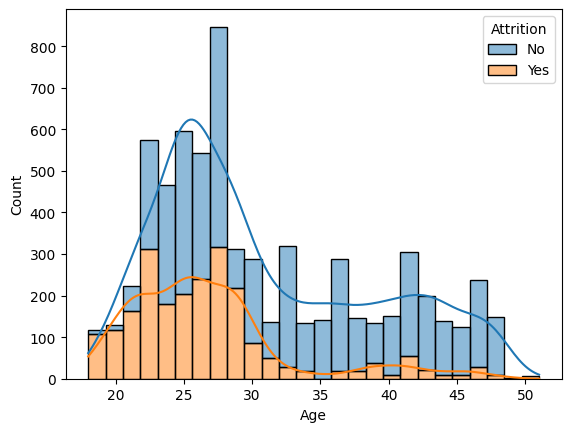

In [40]:
sns.histplot(data=merged_data, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.show()

We created a scatter plot to explore the relationship between employee age and salary. This visualization allowed us to observe any potential correlation between age and salary, setting the stage for further analysis of their linear relationship.

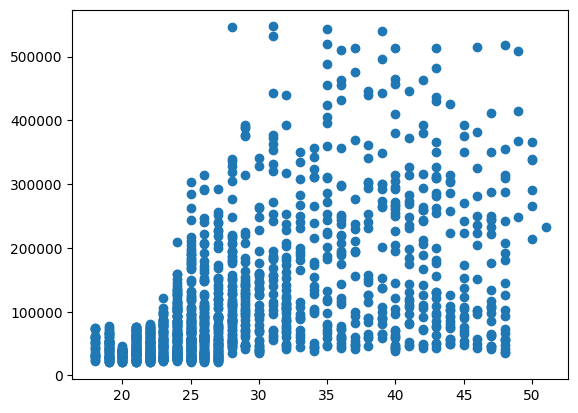

In [41]:
plt.scatter (employeeData['Age'],employeeData['Salary'])
plt.show()

To quantify the relationship between age and salary, we added a linear regression line to the scatter plot. By fitting a linear polynomial to the data, we confirmed that the relationship between age and salary is linear, providing a clearer understanding of how salary tends to change with age.


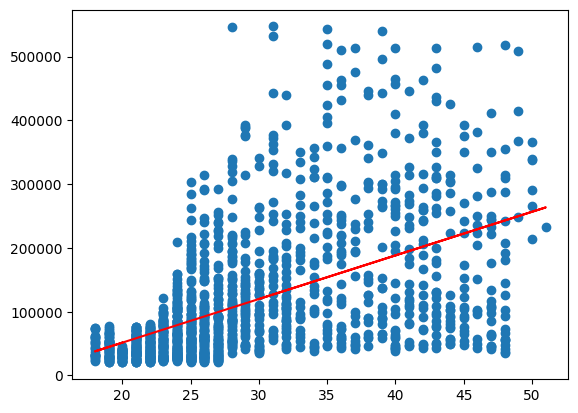

In [42]:
plt.scatter (employeeData['Age'],employeeData['Salary'])
z = np.polyfit(employeeData['Age'],employeeData['Salary'], 1)  # 1 is the degree of the polynomial (linear)
p = np.poly1d(z)
plt.plot(employeeData['Age'], p(employeeData['Age']), color='red')
plt.show()

We created a box plot to examine the relationship between education levels and salary. This visualization provided insights into how salary distributions vary across different educational backgrounds, highlighting any significant differences in salary associated with each level of education.

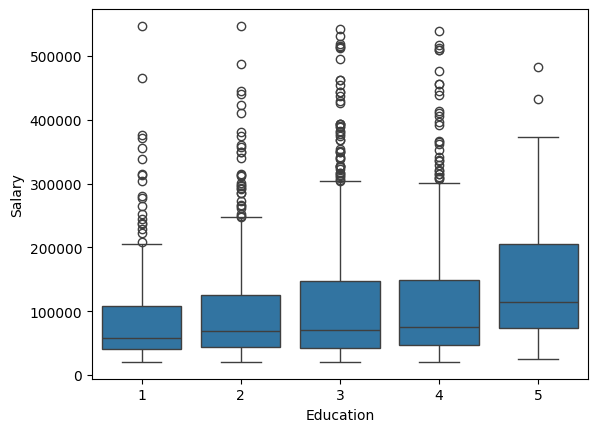

In [43]:
sns.boxplot(x='Education', y='Salary', data=employeeData)
plt.show()

We generated a box plot to analyze the salary distribution for various job roles, segmented by attrition status. This visualization allowed us to observe how salaries differ among job roles and whether attrition has any noticeable impact on salary distribution within each role.


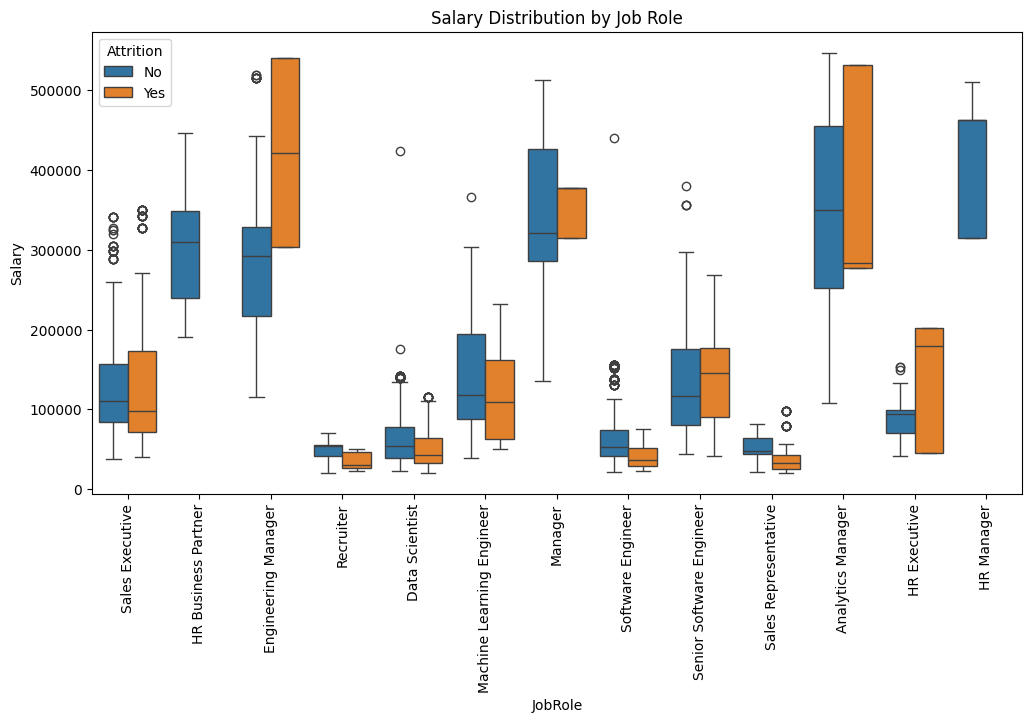

In [44]:
# Box plot for Salary distribution by Job Role
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='JobRole', y='Salary', hue='Attrition')
plt.title('Salary Distribution by Job Role')
plt.xticks(rotation=90)
plt.show()

We created a box plot to explore the salary distribution across different departments, with a focus on attrition status. This visualization helped us understand how salaries are distributed within each department and whether attrition influences salary patterns.


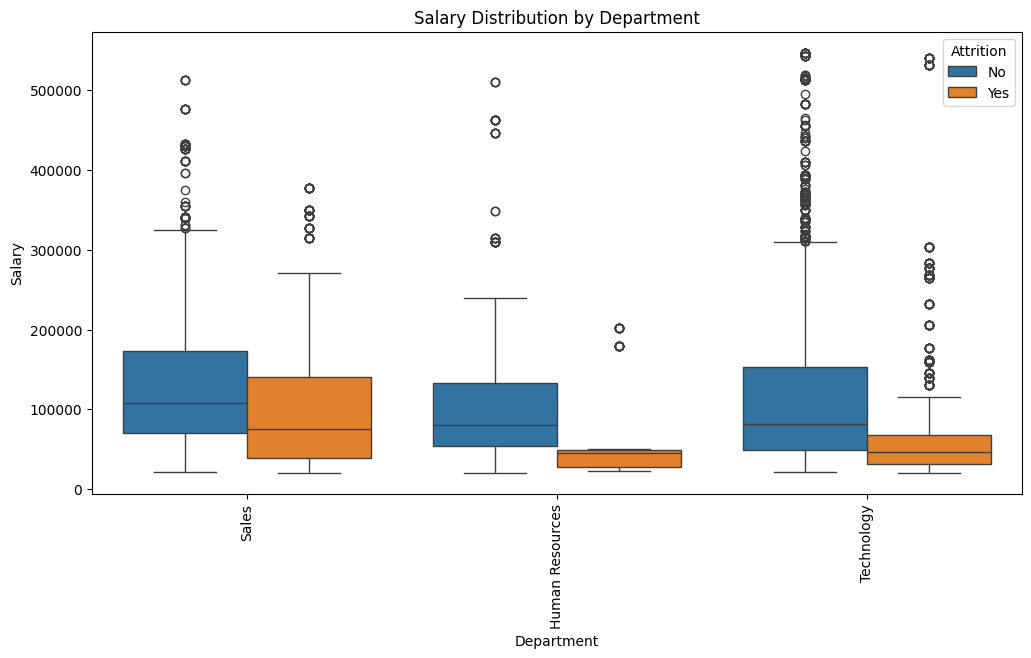

In [45]:
# Box plot for Salary distribution by Department
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Department', y='Salary', hue='Attrition')
plt.title('Salary Distribution by Department')
plt.xticks(rotation=90)
plt.show()


We visualized the relationship between job roles and overtime status using a count plot. This plot highlighted the distribution of employees who worked overtime across different job roles, providing insights into which roles are more likely to require overtime work.


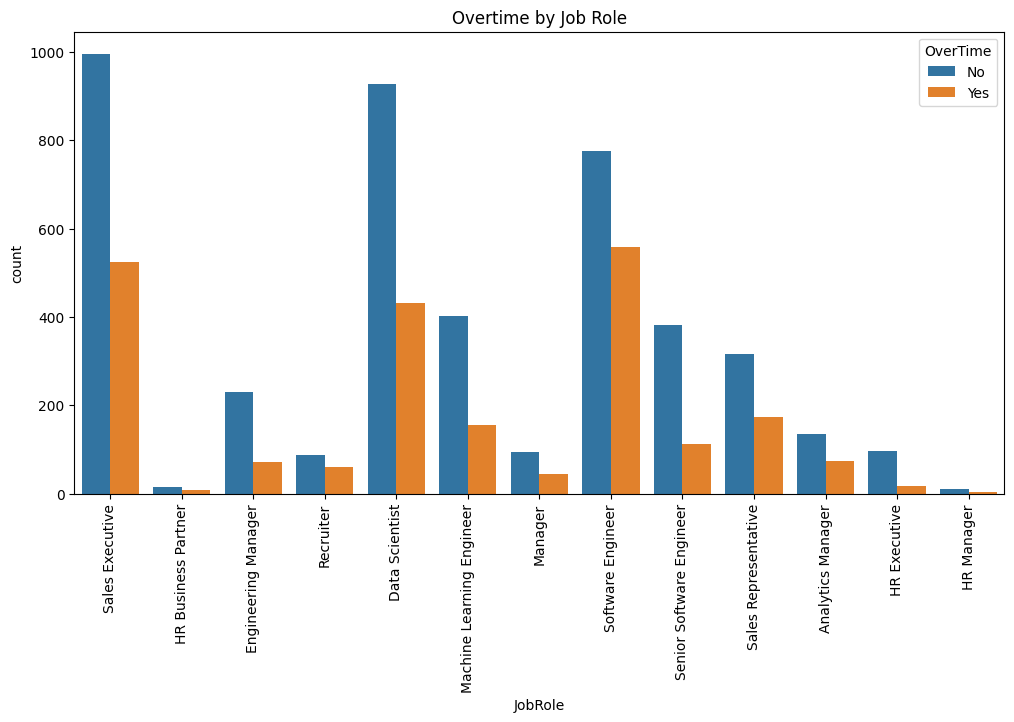

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='JobRole', hue='OverTime')
plt.title('Overtime by Job Role')
plt.xticks(rotation=90)
plt.show()

We generated a box plot to analyze how salary distributions differ between employees who worked overtime and those who did not. This visualization allowed us to identify any significant variations in salary based on overtime status, offering insights into the financial implications of overtime work.

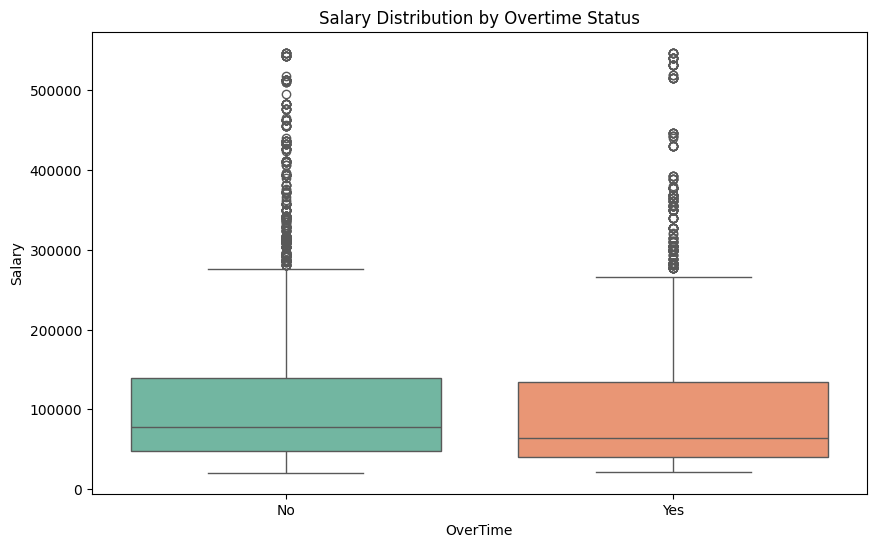

In [47]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='OverTime', y='Salary', hue='OverTime', data=merged_data, palette="Set2", legend=False)

plt.title('Salary Distribution by Overtime Status')
plt.xlabel('OverTime')
plt.ylabel('Salary')

# Display the plot
plt.show()

## 3- Data Forecast

We selected key features relevant to predicting employee attrition, including demographic, job-related, and satisfaction metrics. These features will serve as inputs for our predictive model.


In [48]:
important_features = [
    'Age', 'Gender', 'BusinessTravel', 'Department', 'State', 'Ethnicity', 'Salary',
    'EducationLevel', 'JobRole', 'MaritalStatus', 'OverTime', 'YearsAtCompany',
    'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance',
    'SelfRating', 'ManagerRating', 'TrainingOpportunitiesTaken'
]

We extracted the defined features into a new DataFrame `X` and isolated the target variable `y`, which represents employee attrition status. This sets the stage for subsequent data processing and modeling.


In [49]:
X = merged_data[important_features].copy()
y = merged_data['Attrition']

We applied label encoding to binary categorical features ('Gender' and 'OverTime') and one-hot encoding to non-binary categorical features. This ensures all categorical data is appropriately formatted for model training.


In [50]:


# 1. Label Encoding for binary categorical features
label_encoder = LabelEncoder()

# Encoding 'Gender' and 'OverTime' (binary features)
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['OverTime'] = label_encoder.fit_transform(X['OverTime'])

# 2. One-Hot Encoding for the remaining non-binary categorical features
categorical_columns = ['BusinessTravel', 'Department', 'State', 'Ethnicity', 'EducationLevel', 'JobRole', 'MaritalStatus', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance',
    'SelfRating', 'ManagerRating',]

# Apply OneHotEncoder only to non-binary categorical columns
one_hot_encoder = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_columns)],
    remainder='passthrough'  # Keep the other columns as they are (including label-encoded ones)
)

# Transform the data
X_transformed = one_hot_encoder.fit_transform(X)

# Convert the result back to a DataFrame with feature names
encoded_feature_names = one_hot_encoder.get_feature_names_out()
X_transformed = pd.DataFrame(X_transformed, columns=encoded_feature_names)

# X_transformed now contains both one-hot encoded and label-encoded features, ready for modeling


We split the transformed feature set into training and testing subsets, allocating 20% of the data for testing to evaluate model performance. The features were then standardized using `StandardScaler` to ensure that all variables contribute equally to the model's predictions. Subsequently, we trained a logistic regression model on the scaled training data and made predictions on the test set. Finally, we calculated and displayed the model's accuracy, providing insight into its effectiveness in predicting employee attrition.





In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 89.05%
